# Elementary Introduction to Linear Algebra with NumPy

This notebook is to be read with the slides.

Author: Pierre Nugues

_À mes anciens profs de maths, un élève respectueux_

_À ma HP-21_

In [1]:
import torch

In [2]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-10-27 12:16:10.745496: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Creating vectors

In [17]:
np.array([2, 3])
np.array([1, 2, 3])

1

In [5]:
torch.tensor([2, 3])
torch.tensor([1, 2, 3])

tensor([1, 2, 3])

## Indices and Slices

In [52]:
vector = np.array([1, 2, 3, 4])
vector

array([1, 2, 3, 4])

In [53]:
vector[1] # 2

2

In [54]:
vector[:1] # [1]

array([1])

In [55]:
vector[1:3] # [2, 3]

array([2, 3])

In [61]:
vector = torch.tensor([1, 2, 3, 4])
vector

tensor([1, 2, 3, 4])

In [62]:
vector[0]

tensor(1)

In [63]:
vector[:1]

tensor([1])

In [64]:
vector[1:3]

tensor([2, 3])

## Visualizing vectors

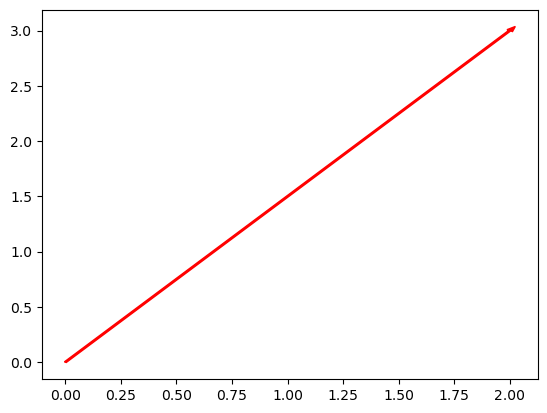

In [49]:
plt.arrow(0, 0, np.array([2, 3])[0], np.array([2, 3])[1], width=0.01, color='red')

## Operations in the vector space

In [68]:
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

In [66]:
3 * np.array([1, 2, 3])

array([3, 6, 9])

In [69]:
torch.tensor([1, 2, 3]) + torch.tensor([4, 5, 6])

tensor([5, 7, 9])

In [67]:
3 * torch.tensor([1, 2, 3])

tensor([3, 6, 9])

## From NumPy to PyTorch and vice-versa

In [58]:
np_array = np.array([1, 2, 3])
tensor = torch.from_numpy(np_array)
tensor

tensor([1, 2, 3])

In [59]:
tensor = torch.tensor([1, 2, 3])
np_array = tensor.numpy()
np_array

array([1, 2, 3])

## Data Types

In [81]:
vector = np.array([1, 2, 3])

In [82]:
vector.dtype

dtype('int64')

In [83]:
vector = np.array([1, 2, 3], dtype='int32')
vector


array([1, 2, 3], dtype=int32)

In [84]:
vector.dtype

dtype('int32')

In [85]:
vector = np.array([1, 2, 3], dtype='float64')
vector

array([1., 2., 3.])

In [86]:
vector.dtype

dtype('float64')

In [87]:
np.array([0, 1, 2, 3], dtype='bool')

array([False,  True,  True,  True])

In [90]:
torch.tensor([1, 2, 3]).dtype

torch.int64

In [100]:
torch.tensor([1, 2, 3], dtype=torch.float16)

tensor([1., 2., 3.], dtype=torch.float16)

## Dot Product

In [102]:
np.dot(np.array([1, 2, 3]), np.array([4, 5, 6]))

32

In [101]:
np.array([1, 2, 3]) @ np.array([4, 5, 6])

32

In [103]:
torch.dot(torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6]))

tensor(32)

In [104]:
torch.tensor([1, 2, 3]) @ torch.tensor([4, 5, 6])

tensor(32)

## Norm

In [105]:
np.linalg.norm(np.array([1, 2, 3]))

3.7416573867739413

In [108]:
torch.norm(torch.tensor([1.0, 2.0, 3.0]))

tensor(3.7417)

## NumPy Matrices
Let us give values to this system:
$$
\begin{array}{lcl}
a_{11} u_1 + a_{12} u_2 &=& v_1\\
a_{21} u_1 + a_{22} u_2 &=& v_2\\
\end{array}
$$
For instance:
$$
\begin{array}{lcl}
1\times u_1 + 2\times u_2 &=& v_1\\
3 \times u_1 + 4 \times u_2 &=& v_2\\
\end{array}
$$
We have:
$$
\begin{bmatrix}
1 &2\\
3 &4\\
\end{bmatrix}  
\begin{bmatrix}
5\\
6\\
\end{bmatrix} =
\begin{bmatrix}
17\\
39\\
\end{bmatrix}
$$

In [134]:
A = np.array([[1, 2],
          [3, 4]])
A @ np.array([5, 6])

array([17, 39])

In [135]:
A[0, 1]

2

In [138]:
A = torch.tensor([[1, 2],
          [3, 4]])
A @ torch.tensor([5, 6])

tensor([17, 39])

In [139]:
A[0, 1]

tensor(2)

## Matrices and Rotations

We will now have a look at vector rotation. From algebra courses, we know that we can use a matrix to compute a rotation of angle $\theta$. For a two-dimensional vector, the rotation matrix is:
$$
\mathbf{R}_{\theta} =
\begin{bmatrix*}
\cos \theta &-\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix*}.
$$

In [112]:
theta_45 = np.pi/4
rot_mat_45 = np.array([[np.cos(theta_45), -np.sin(theta_45)],
          [np.sin(theta_45), np.cos(theta_45)]])
rot_mat_45

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

we rotate vector (1, 1) by this angle

In [113]:
rot_mat_45 @ np.array([1, 1])

array([1.11022302e-16, 1.41421356e+00])

The matrix of a sequence of rotations, for instance a rotation of $\pi/6$ followed by a rotation of $\pi/4$, is simply the matrix product of the individual rotations $\mathbf{R}_{{\theta}_1} \mathbf{R}_{{\theta}_2}  = \mathbf{R}_{{\theta}_1 + {\theta}_2}$, here $\mathbf{R}_{\pi/4} \mathbf{R}_{\pi/6}  = \mathbf{R}_{5\pi/12}$. 

In [114]:
theta_30 = np.pi/6
rot_mat_30 = np.array([[np.cos(theta_30), -np.sin(theta_30)],
          [np.sin(theta_30), np.cos(theta_30)]])
rot_mat_30

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [115]:
rot_mat_30 @ rot_mat_45

array([[ 0.25881905, -0.96592583],
       [ 0.96592583,  0.25881905]])

In [116]:
rot_mat_45 @ rot_mat_30

array([[ 0.25881905, -0.96592583],
       [ 0.96592583,  0.25881905]])

In [117]:
np.arccos(0.25881905)

1.3089969339255036

In [118]:
np.pi/4 + np.pi/6

1.308996938995747

With PyTorch

In [121]:
torch.from_numpy(rot_mat_30) @ torch.from_numpy(rot_mat_45)

tensor([[ 0.2588, -0.9659],
        [ 0.9659,  0.2588]], dtype=torch.float64)

In [120]:
torch.from_numpy(rot_mat_45) @ torch.from_numpy(rot_mat_30)

tensor([[ 0.2588, -0.9659],
        [ 0.9659,  0.2588]], dtype=torch.float64)

## Inverse

In [123]:
np.linalg.inv(rot_mat_30)

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [127]:
np.linalg.inv(rot_mat_30) @ rot_mat_30

array([[1.00000000e+00, 0.00000000e+00],
       [5.55111512e-17, 1.00000000e+00]])

In [129]:
torch.inverse(torch.from_numpy(rot_mat_30)) 

tensor([[ 0.8660,  0.5000],
        [-0.5000,  0.8660]], dtype=torch.float64)

## Size of a Matrix

In [151]:
A = np.array([[1, 2, 3],
            [4, 5, 6]])
A.shape

(2, 3)

In [155]:
A = torch.tensor([[1, 2, 3],
            [4, 5, 6]])
A.size()

torch.Size([2, 3])

In [157]:
u = np.array([1, 2, 3])
u.shape

(3,)

In [159]:
u = torch.tensor([1, 2, 3])
u.size()

torch.Size([3])

## Transpose

In [141]:
A = np.array([[1, 2],
          [3, 4]])
A.T

array([[1, 3],
       [2, 4]])

In [142]:
A = torch.tensor([[1, 2],
          [3, 4]])
A.T

tensor([[1, 3],
        [2, 4]])

## Transposing a Vector

In [145]:
x = np.array([1, 2, 3])
x.T

array([1, 2, 3])

In [146]:
x = torch.tensor([1, 2, 3])
x.T

/var/folders/29/s86dlfss3gq6ybhg4frthtxr0000gp/T/ipykernel_48451/2773976921.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2985.)
  x.T


tensor([1, 2, 3])

## Reshaping a Vector

In [165]:
u = np.array([1, 2, 3])
u.reshape((1,3))

array([[1, 2, 3]])

In [166]:
u.reshape((1,3)).T

array([[1],
       [2],
       [3]])

In [169]:
u = torch.tensor([1, 2, 3])
u.reshape((1,-1))

tensor([[1, 2, 3]])

In [170]:
u.reshape((1,-1)).T

tensor([[1],
        [2],
        [3]])

In [172]:
u = np.array([1, 2, 3])
u.reshape((3,-1))

array([[1],
       [2],
       [3]])

## Utilities

In [173]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [175]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [176]:
np.ones((2, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [177]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [187]:
np.random.rand(2, 4)

array([[0.09258549, 0.52194984, 0.65409009, 0.12542402],
       [0.34564906, 0.47653972, 0.38222943, 0.52735964]])

In [188]:
torch.rand(2, 4)

tensor([[0.4655, 0.8772, 0.7381, 0.3021],
        [0.6198, 0.9956, 0.5826, 0.8602]])

## Matrices and Neural Nets: One Layer

### Keras

In [317]:
layer1_k = keras.Sequential([
    layers.Dense(4, input_dim=3, use_bias=False)
    ])

In [318]:
layer1_k.weights

[<tf.Variable 'dense_15/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[-0.62047374,  0.77481735,  0.01930374, -0.05884182],
        [ 0.6178018 , -0.06696081,  0.2296443 , -0.2170434 ],
        [ 0.13795424,  0.22487962,  0.47652638, -0.75400156]],
       dtype=float32)>]

In [319]:
x_np = np.array([[1, 2, 3]])

In [336]:
layer1_k(x_np)

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[ 1.0289925,  1.3155346,  1.9081714, -2.7549334]], dtype=float32)>

In [321]:
x_np @ layer1_k.weights[0]

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[ 1.0289925,  1.3155346,  1.9081714, -2.7549334]], dtype=float32)>

### PyTorch

In [322]:
layer1_t = torch.nn.Linear(3, 4, bias=False)

In [323]:
layer1_t.weight

Parameter containing:
tensor([[ 0.2472, -0.4360,  0.0955],
        [-0.4775, -0.2369,  0.0147],
        [ 0.2489,  0.3770,  0.2392],
        [-0.1870, -0.0463, -0.2020]], requires_grad=True)

In [324]:
x_t = torch.tensor([1.0, 2.0, 3.0])

In [325]:
layer1_t(x_t)

tensor([-0.3382, -0.9072,  1.7203, -0.8855], grad_fn=<MvBackward0>)

In [326]:
layer1_t.weight @ x_t

tensor([-0.3382, -0.9072,  1.7203, -0.8855], grad_fn=<SqueezeBackward3>)

Or see: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [327]:
x_t @ layer1_t.weight.T

tensor([-0.3382, -0.9072,  1.7203, -0.8855], grad_fn=<SqueezeBackward3>)

## Matrices and Neural Nets: More Layers

### Keras

In [328]:
nn_k = keras.Sequential([
    layers.Dense(4, input_dim=3, use_bias=False),
    layers.Dense(2, use_bias=False),
    layers.Dense(1, use_bias=False)
    ])

In [329]:
nn_k.weights

[<tf.Variable 'dense_16/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[-0.06800884, -0.8439874 ,  0.88863504, -0.06249452],
        [ 0.15014172, -0.12249053,  0.13481188,  0.02347076],
        [-0.53197116, -0.8885655 ,  0.52032065,  0.89764893]],
       dtype=float32)>,
 <tf.Variable 'dense_17/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.4255314 ,  0.7791736 ],
        [ 0.8866534 ,  0.985332  ],
        [ 0.9546411 ,  0.7486627 ],
        [-0.95155597,  0.39476156]], dtype=float32)>,
 <tf.Variable 'dense_18/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.9449475 ],
        [ 0.51173484]], dtype=float32)>]

In [335]:
nn_k(x_np)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.7943149]], dtype=float32)>

In [331]:
x_np @ nn_k.weights[0] @ nn_k.weights[1] @ nn_k.weights[2]

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.7943149]], dtype=float32)>

### PyTorch

In [332]:
layer1_t = torch.nn.Linear(3, 4, bias=False)
layer2_t = torch.nn.Linear(4, 2, bias=False)
layer3_t = torch.nn.Linear(2, 1, bias=False)

In [337]:
(layer1_t.weight, layer2_t.weight, layer3_t.weight)

(Parameter containing:
 tensor([[-0.0924, -0.5735,  0.1035],
         [-0.5186,  0.3997, -0.5660],
         [-0.4175, -0.0082, -0.4374],
         [ 0.3039, -0.2471, -0.5130]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0287, -0.1054, -0.2612, -0.4309],
         [-0.1146, -0.2702, -0.3025,  0.1236]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.6471, -0.6665]], requires_grad=True))

In [333]:
layer3_t(layer2_t(layer1_t(x_t)))

tensor([0.3210], grad_fn=<SqueezeBackward3>)

In [334]:
x_t @ layer1_t.weight.T @ layer2_t.weight.T @ layer3_t.weight.T

tensor([0.3210], grad_fn=<SqueezeBackward3>)

## Datasets

In [338]:
from sklearn.datasets import load_iris

In [343]:
iris_dataset = load_iris()

In [362]:
X = torch.from_numpy(iris_dataset['data']).float()

In [364]:
X.dtype

torch.float32

In [365]:
layer1_t = torch.nn.Linear(4, 25, bias=False)
layer2_t = torch.nn.Linear(25, 25, bias=False)
layer3_t = torch.nn.Linear(25, 3, bias=False)

In [366]:
layer3_t(layer2_t(layer1_t(X)))

tensor([[-0.1842, -0.2774, -0.2791],
        [-0.2278, -0.2671, -0.2780],
        [-0.1739, -0.2551, -0.2575],
        [-0.1576, -0.2670, -0.2650],
        [-0.1533, -0.2753, -0.2717],
        [-0.1617, -0.2992, -0.2948],
        [-0.1270, -0.2547, -0.2489],
        [-0.1757, -0.2815, -0.2811],
        [-0.1639, -0.2515, -0.2524],
        [-0.1983, -0.2830, -0.2862],
        [-0.1938, -0.2959, -0.2972],
        [-0.1363, -0.2835, -0.2755],
        [-0.2053, -0.2713, -0.2772],
        [-0.1495, -0.2329, -0.2332],
        [-0.2351, -0.2866, -0.2969],
        [-0.1494, -0.2966, -0.2905],
        [-0.1927, -0.2676, -0.2729],
        [-0.1910, -0.2703, -0.2744],
        [-0.2174, -0.3143, -0.3180],
        [-0.1381, -0.2808, -0.2740],
        [-0.2234, -0.3091, -0.3141],
        [-0.1599, -0.2728, -0.2713],
        [-0.1212, -0.2319, -0.2277],
        [-0.2113, -0.2779, -0.2854],
        [-0.1130, -0.3072, -0.2919],
        [-0.2281, -0.2858, -0.2944],
        [-0.1814, -0.2751, -0.2771],
 

In [368]:
X @ layer1_t.weight.T @ layer2_t.weight.T @ layer3_t.weight.T

tensor([[-0.1842, -0.2774, -0.2791],
        [-0.2278, -0.2671, -0.2780],
        [-0.1739, -0.2551, -0.2575],
        [-0.1576, -0.2670, -0.2650],
        [-0.1533, -0.2753, -0.2717],
        [-0.1617, -0.2992, -0.2948],
        [-0.1270, -0.2547, -0.2489],
        [-0.1757, -0.2815, -0.2811],
        [-0.1639, -0.2515, -0.2524],
        [-0.1983, -0.2830, -0.2862],
        [-0.1938, -0.2959, -0.2972],
        [-0.1363, -0.2835, -0.2755],
        [-0.2053, -0.2713, -0.2772],
        [-0.1495, -0.2329, -0.2332],
        [-0.2351, -0.2866, -0.2969],
        [-0.1494, -0.2966, -0.2905],
        [-0.1927, -0.2676, -0.2729],
        [-0.1910, -0.2703, -0.2744],
        [-0.2174, -0.3143, -0.3180],
        [-0.1381, -0.2808, -0.2740],
        [-0.2234, -0.3091, -0.3141],
        [-0.1599, -0.2728, -0.2713],
        [-0.1212, -0.2319, -0.2277],
        [-0.2113, -0.2779, -0.2854],
        [-0.1130, -0.3072, -0.2919],
        [-0.2281, -0.2858, -0.2944],
        [-0.1814, -0.2751, -0.2771],
 